# 준비

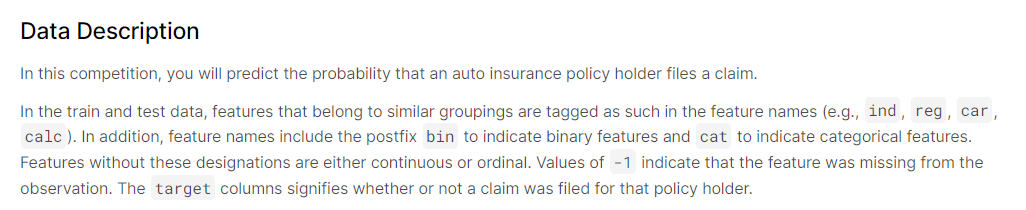

In [4]:
from Myfunc import *

mysetting()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Noto Sans KR", size=9) # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정
pd.options.display.max_columns = 50 # 칼럼수 50개까지




In [5]:
import sklearn
import lightgbm
import xgboost
import scipy
import bayes_opt
import matplotlib
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print(
    np.__version__,
    pd.__version__,
    sns.__version__,
    matplotlib.__version__,
    sklearn.__version__,
    scipy.__version__,
    lightgbm.__version__,
    xgboost.__version__,
    sep="\n")

1.22.0
1.4.2
0.11.2
3.5.1
1.0.2
1.8.0
3.3.2
1.6.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("data/train.csv",index_col='id')
test = pd.read_csv("data/test.csv",index_col='id')
submission = pd.read_csv("data/sample_submission.csv",index_col='id')

In [8]:
pd.options.display.max_columns = 50
train.shape, test.shape

((595212, 58), (892816, 57))

In [9]:
train.head(3)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,...,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,...,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,...,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,...,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0


In [10]:
test.head(3)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,...,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,...,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,...,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,...,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0


In [11]:
submission.head(3)

,target
id,
0,0.0364
1,0.0364
2,0.0364


## 결측값이 -1로 표시되어있음

<AxesSubplot:>

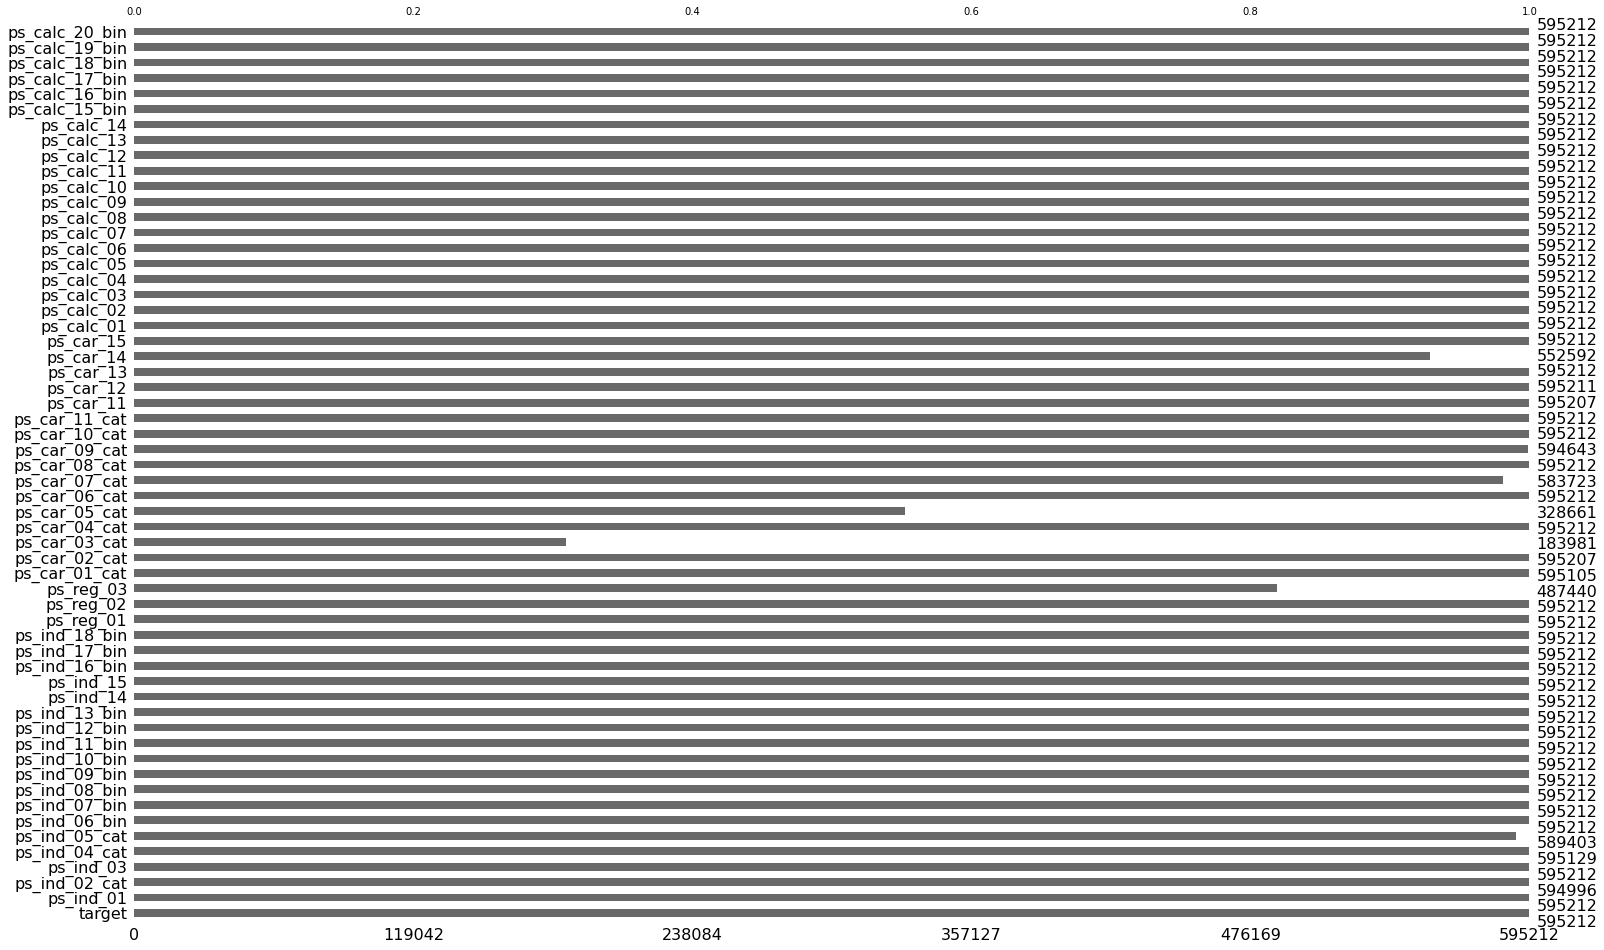

In [12]:
import missingno as msno #결측값 시각화

# 훈련데이터의 사본에서 -1을 NaN으로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화()
msno.bar(df=train_copy)

In [13]:
summary = resumetable2(train, -1)
summary

데이터 셋 형상 : (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


# 데이터 시각화

## 이진형데이터

In [11]:
bin_features = summary[summary["데이터 종류"] == "이진형"].index
len(bin_features)

18

Wall time: 1min 46s


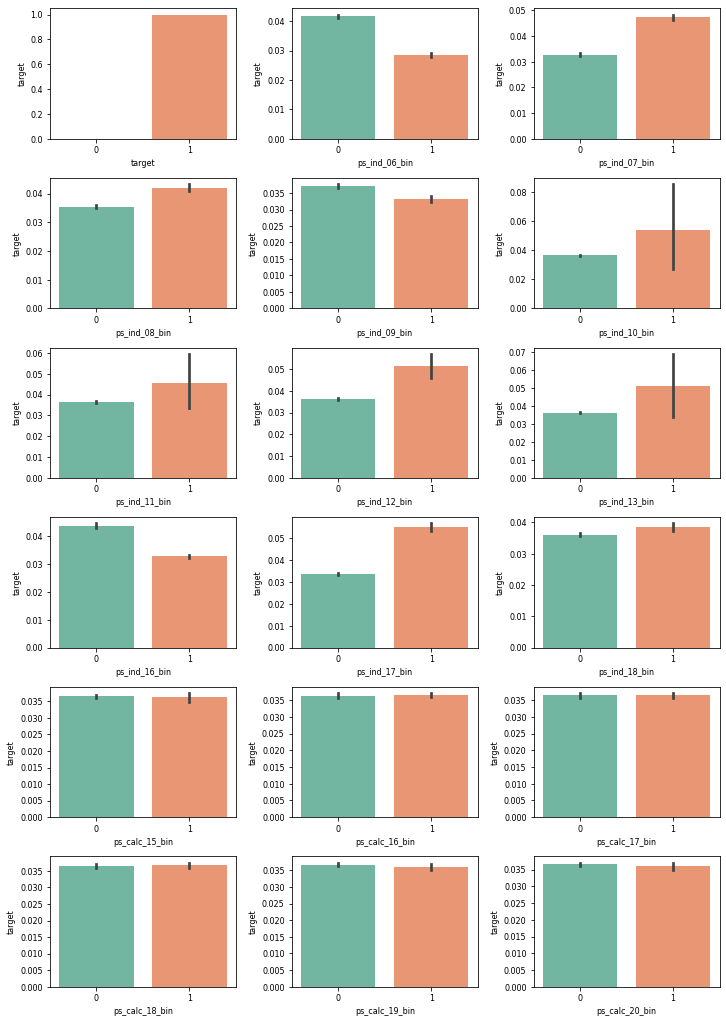

In [12]:
%%time
plot_target_ratio_by_features(train, bin_features, 6, 3)

* ps_ind_10~13_bin 신뢰구간이 너무 넓음
* ps_calc_15~20_bin 고유값별 타깃값 비율 차이가 없음

## 명목형데이터

Wall time: 1min 20s


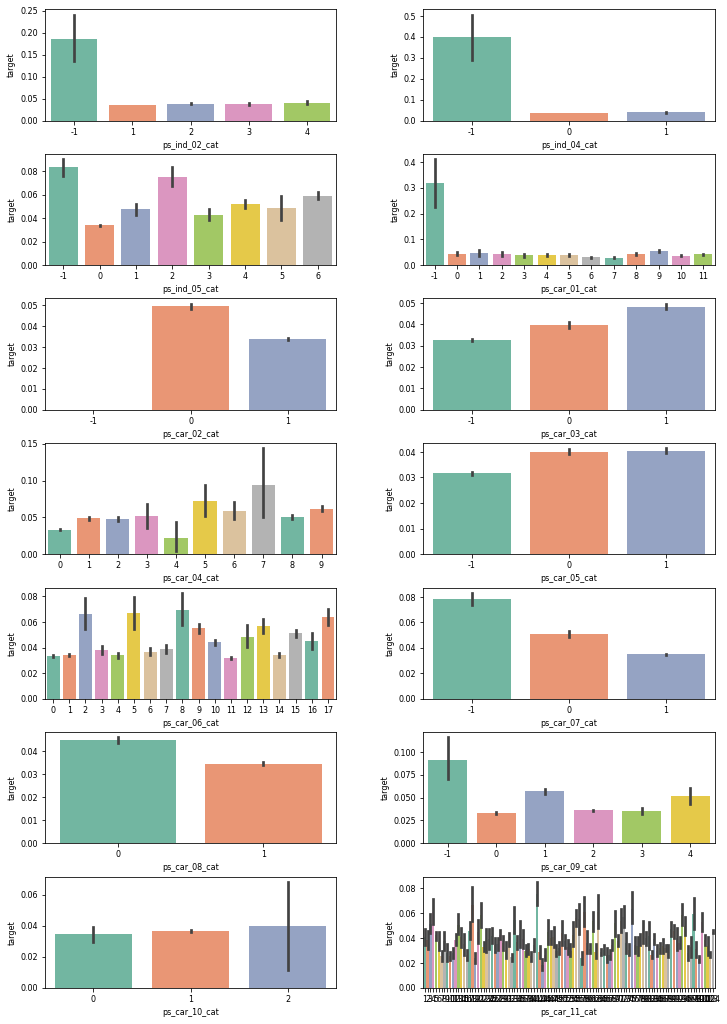

In [13]:
%%time

nom_features = summary[summary["데이터 종류"] =="명목형"].index

plot_target_ratio_by_features(train, nom_features, 7, 2)

* 결측값을 처리하지않아도 될 것으로 보임
* 모두 피처에 사용

## 순서형 데이터

In [14]:
ord_features = summary[summary["데이터 종류"] == "순서형"].index
len(ord_features)

16

Wall time: 1min 21s


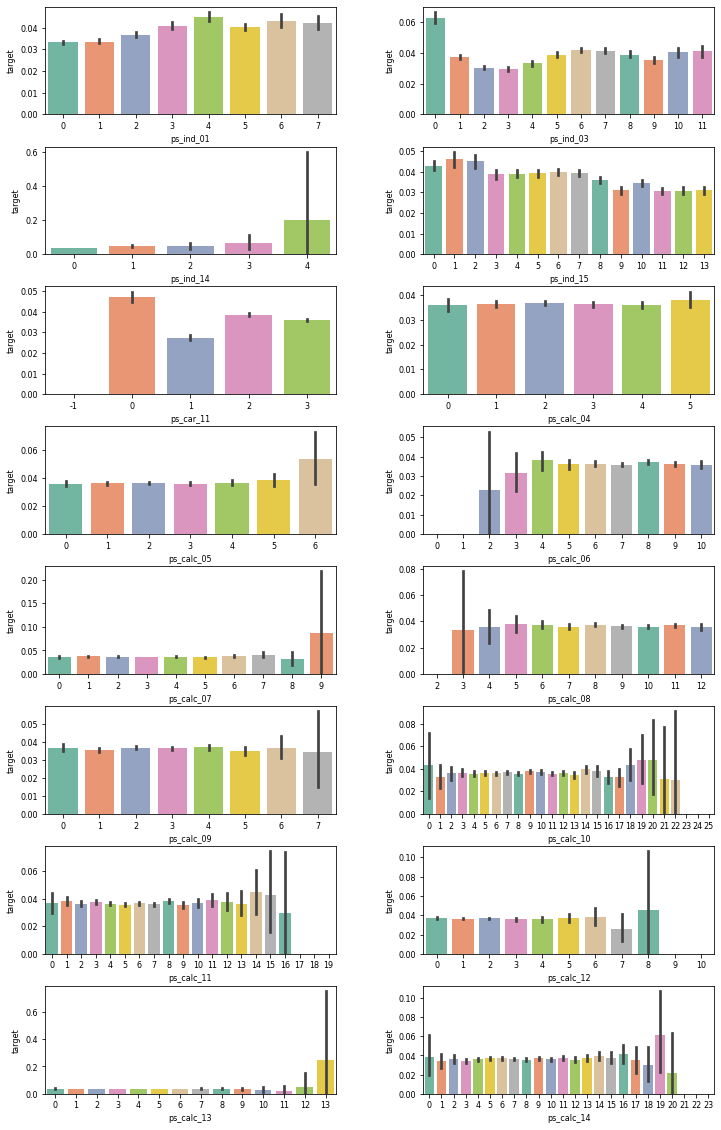

In [15]:
%%time
plot_target_ratio_by_features(train, ord_features, 8,2, size=(12,20))

* ps_ind_14 타깃값 비율의 신뢰구간이 너무 넓음
* ps_calc_04~14 고윳값별 타깃값 비율차이가 없음, 있더라도 신뢰구간이 너무 넓음

## 연속형 데이터

연속형 데이터는 고윳값이 굉장히 많다, 고윳값별 타깃값 1 비율을 구하는 것은 힘들기 때문에 구간별 타깃값을 확인한다.

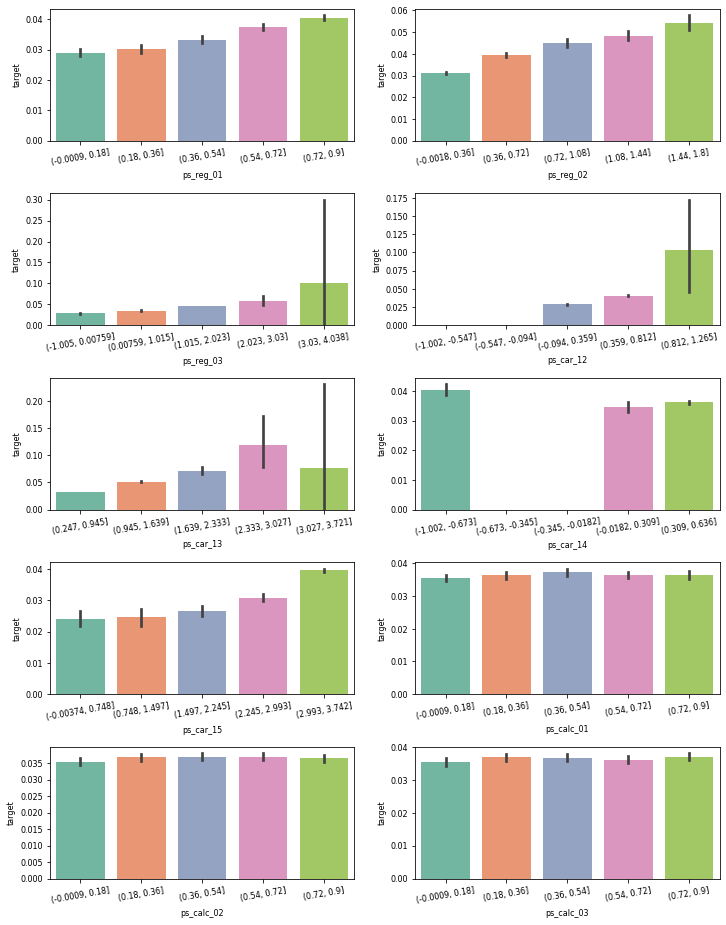

In [16]:
import matplotlib.gridspec as gridspec

cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전

* ps_calc_01~03 구간별 타깃값 비율차이가 없음

Wall time: 240 ms


<AxesSubplot:>

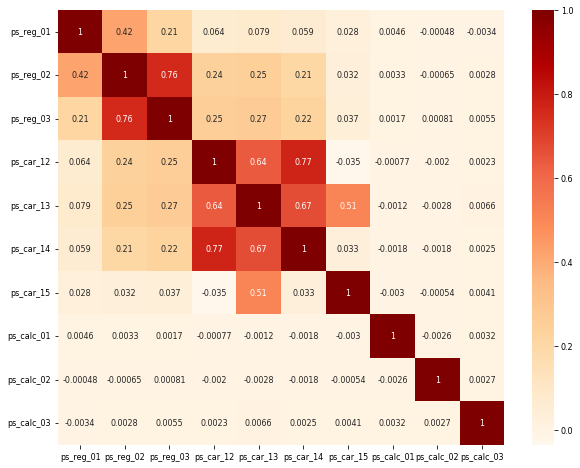

In [17]:
%%time

train_copy = train_copy.dropna()
plt.figure(figsize=(10,8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap="OrRd")

* ps_car_14 상관관계가 너무 강함

## 제거할 피쳐 정리

* ps_car_14 상관관계가 너무 강함
* ps_calc_01~03 구간별 타깃값 비율차이가 없음
* ps_ind_14 타깃값 비율의 신뢰구간이 너무 넓음
* ps_calc_04~14 고윳값별 타깃값 비율차이가 없음, 있더라도 신뢰구간이 너무 넓음
* ps_ind_10~13_bin 신뢰구간이 너무 넓음
* ps_calc_15~20_bin 고유값별 타깃값 비율 차이가 없음
---
* 즉 calc 피쳐는 쓰지 않음
* ind_10~14까지의 피쳐는 쓰지 않음
* car_14 피쳐쓰지않음

# 데이터 전처리

In [13]:
train = pd.read_csv("data/train.csv",index_col='id')
test = pd.read_csv("data/test.csv",index_col='id')
submission = pd.read_csv("data/sample_submission.csv",index_col='id')

In [14]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop("target", axis=1)

In [15]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

## 명목형 피처 원-핫 인코딩

In [16]:
from sklearn.preprocessing import OneHotEncoder

# cat_features = [feature for feature in all_feature if "cat" in feature]

cat_features = []
for feature in all_features:
    if "cat" in feature:
        cat_features.append(feature)

onehot_encoder = OneHotEncoder()

encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

## 필요없는 피쳐 제거

In [17]:
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

* 즉 calc 피쳐는 쓰지 않음
* ind_10~14까지의 피쳐는 쓰지 않음
* car_14 피쳐쓰지않음

In [18]:
drop_features = ["ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin","ps_ind_13_bin","ps_ind_14","ps_car_14"]

remaining_features = [feature for feature in all_features
                     if ("cat" not in feature and "calc" not in feature and feature not in drop_features)]

In [19]:
remaining_features

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_15']

In [20]:
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format="csr")

## 데이터 나누기

In [21]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

# 평가지표 계산 함수 작성

In [22]:
from Myeval import lgb_gini
from Myeval import xgb_gini

# 베이스 모델 제작

## OOF 방식으롤 LightGBM 훈련

In [3]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991) # 시계열데이터가 없으므로 데이터 shuffle을 추가했다.

#LightGBM의 하이퍼파라미터
parmas = {"objective" : "binary",  # 이진분류 문제
         "learning_rate" : 0.01,          # 학습률
         "force_row_wise" : True,     # 경고문구제거
         "random_state" : 0}              # 랜덤시드

# OOF방식 훈련모델, 검증 데이터 타깃값을 예측한 확률
oof_val_preds = np.zeros(X.shape[0])
# OOF방식 훈련모델, 테스트 테이터 타깃값을 예측한 확률
oof_test_preds = np.zeros(test_input.shape[0])

NameError: name 'X' is not defined

In [49]:
%%time
import lightgbm as lgb

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구
    print("#"*40, f"폴드 {idx+1} / 폴드 {folds.n_splits}", "#"*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    train_input, train_target = X[train_idx], y[train_idx] # 훈련
    val_input, val_target = X[valid_idx], y[valid_idx] # 검증
    
    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(train_input, train_target)
    dvalid = lgb.Dataset(val_input, val_target)
    
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=parmas,     # 훈련용 파라미터
                         train_set=dtrain,                     # 훈련데이터 셋 
                         num_boost_round=1000,        # 부스팅 반복 횟수
                         valid_sets=dvalid,                    # 성능 평가용 검증 데이터 셋
                         feval=lgb_gini,                                 # 검증용 평가지표
                         early_stopping_rounds=100,   # 조기종료 조건
                         verbose_eval=100)                   # 100번째마다 점수 출력
    
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(test_input)/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(val_input)
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(val_target, oof_val_preds[valid_idx])
    print(f"폴드 {idx+1} 지니계수 : {gini_score}\n")

######################################## 폴드 1 / 폴드 5 ########################################


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[500]	valid_0's binary_logloss: 0.151713	valid_0's gini: 0.287944
[600]	valid_0's binary_logloss: 0.151672	valid_0's gini: 0.288637
[700]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.288939
Early stopping, best iteration is:
[681]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.289034
폴드 1 지니계수 : 0.2890336154188232

##########

In [50]:
print('OOF 검증 데이터 지니계수:', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수: 0.2804995714877777


In [51]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

# 성능개선 1

In [23]:
import numpy as np

In [24]:
train = pd.read_csv("data/train.csv",index_col='id')
test = pd.read_csv("data/test.csv",index_col='id')
submission = pd.read_csv("data/sample_submission.csv",index_col='id')

In [25]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop("target", axis=1)

all_features = all_data.columns

## 명목형 피처 원-핫 인코딩

In [26]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if "cat" in feature]

onehot_encoder = OneHotEncoder()

encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

## 결측값의 개수 피쳐를 추가

In [27]:
all_data["num_missing"] = (all_data==-1).sum(axis=1)

In [28]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features if ("cat" not in feature and "calc" not in feature)]

remaining_features.append("num_missing")

In [29]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if "ind" in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data["mix_ind"] = all_data[ind_feature].astype(str)+"_"
        is_first_feature = False
        
    else:
        all_data["mix_ind"] +=all_data[ind_feature].astype(str)+"_"

## 명목형 피처의 고윳값별 개수를 새로운 피쳐

In [30]:
all_data["ps_ind_02_cat"].value_counts()

 1    1079327
 2     309747
 3      70172
 4      28259
-1        523
Name: ps_ind_02_cat, dtype: int64

In [31]:
all_data["ps_ind_02_cat"].value_counts().to_dict()

{1: 1079327, 2: 309747, 3: 70172, 4: 28259, -1: 523}

In [32]:
cat_count_features = []
for feature in cat_features+["mix_ind"]:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f"{feature}_count"] = all_data[feature].apply(lambda x: val_counts_dict[x])
    
    cat_count_features.append(f"{feature}_count")

## 필요없는 피처 제거

In [33]:
from scipy import sparse

# 필요없는 피처들
drop_features =["ps_ind_14","ps_ind_10_bin", "ps_ind_11_bin","ps_ind_12_bin", "ps_ind_13_bin","ps_car_14"]

# ramain_features + cat_count_features - drop_features
all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining), encoded_cat_matrix], format="csr")

## 데이터 나누기

In [34]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train["target"].values

## 베이지안 최적화를 위한 데이터셋 준비

In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)

# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

## 하이퍼파라미터 범위 설정

In [36]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

In [37]:
# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

## 베이지안 최적화용 평가지표 계산함수 작성

In [38]:
def lgb_eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    
    # 베이지안 최적화를 수행할 하이퍼파라미터 
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터:', params)    
    
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params, 
                           train_set=bayes_dtrain,
                           num_boost_round=2500,
                           valid_sets=bayes_dvalid,
                           feval=lgb_gini,
                           early_stopping_rounds=300,
                           verbose_eval=False)
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid) 
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

## 최적화 수행

In [39]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=lgb_eval_function,      # 평가지표 계산 함수
                                 pbounds=param_bounds, # 하이퍼파라미터 범위
                                 random_state=0)

In [40]:
%%time
from Myeval import *

# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2855811556220905

|  1        |  0.2856   |  0.7646   |  0.6715   |  0.8206   |  0.9545   |  7.695    |  29.38    |  34.38    |
하이퍼파라미터: {'num_leaves': 39, 'lambda_l1': 0.7766883037651555, 'lambda_l2': 0.9791725038082665, 'feature_fraction': 0.6963662760501029, 'bagging_fraction': 0.867531900234624, 'min_child_samples': 8, 'min_child_weight': 27.04133683281797, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in th

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2828993761731121

|  4        |  0.2829   |  0.8978   |  0.6594   |  0.8445   |  0.9234   |  8.619    |  10.55    |  30.09    |
하이퍼파라미터: {'num_leaves': 37, 'lambda_l1': 0.7738449330497988, 'lambda_l2': 0.9032695189818599, 'feature_fraction': 0.6606341064409726, 'bagging_fraction': 0.7666713964943057, 'min_child_samples': 9, 'min_child_weight': 29.306172421380474, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [b

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


지니계수 : 0.28513273331754563

|  5        |  0.2851   |  0.7667   |  0.6606   |  0.7738   |  0.9033   |  8.769    |  29.31    |  36.6     |
하이퍼파라미터: {'num_leaves': 33, 'lambda_l1': 0.8268138957114485, 'lambda_l2': 0.9, 'feature_fraction': 0.6126817698209742, 'bagging_fraction': 0.6626247133728974, 'min_child_samples': 10, 'min_child_weight': 35.87746477712849, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2858318138927059

|  6        |  0.2858   |  0.6626   |  0.6127   |  0.8268   |  0.9      |  9.762    |  35.88    |  32.8     |
하이퍼파라미터: {'num_leaves': 36, 'lambda_l1': 0.7, 'lambda_l2': 0.9, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'min_child_samples': 6, 'min_child_weight': 40.0, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2848613395033384

|  7        |  0.2849   |  0.6      |  0.7      |  0.7      |  0.9      |  6.0      |  40.0     |  35.9     |
하이퍼파라미터: {'num_leaves': 30, 'lambda_l1': 0.7, 'lambda_l2': 0.9, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'min_child_samples': 10, 'min_child_weight': 30.859861883442534, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091


KeyboardInterrupt: 

## 결과확인

In [34]:
max_params = optimizer.max["params"]
max_params

{'bagging_fraction': 0.6213108174593661,
 'feature_fraction': 0.608712929970154,
 'lambda_l1': 0.7040436794880651,
 'lambda_l2': 0.9832619845547939,
 'min_child_samples': 9.112627003799401,
 'min_child_weight': 36.10036444740457,
 'num_leaves': 39.78618342232764}

정수만 받을 수 있는 하이퍼파라미터는 정수형을 변환

In [35]:
max_params["num_leaves"] = int(round(max_params["num_leaves"]))
max_params["min_child_samples"] = int(round(max_params["min_child_samples"]))

고정 하이퍼파라미터 추가

In [36]:
max_params.update(fixed_params)

In [37]:
max_params

{'bagging_fraction': 0.6213108174593661,
 'feature_fraction': 0.608712929970154,
 'lambda_l1': 0.7040436794880651,
 'lambda_l2': 0.9832619845547939,
 'min_child_samples': 9,
 'min_child_weight': 36.10036444740457,
 'num_leaves': 40,
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

## 모델 훈련 및 성능 검증

In [38]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋
                          
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=max_params,    # 최적 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=2500, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=lgb_gini,           # 검증용 평가지표
                          early_stopping_rounds=300, # 조기종료 조건
                          verbose_eval=100)     # 100번째마다 점수 출력
    
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154239	valid_0's gini: 0.270944
[200]	valid_0's binary_logloss: 0.153176	valid_0's gini: 0.275764
[300]	valid_0's binary_logloss: 0.152584	valid_0's gini: 0.279501
[400]	valid_0's binary_logloss: 0.152222	valid_0's gini: 0.282893
[500]	valid_0's binary_logloss: 0.151986	valid_0's gini: 0.286058
[600]	valid_0's binary_logloss: 0.151824	valid_0's gini: 0.288805
[700]	valid_0's binary_logloss: 0.151712	valid_0's gini: 0.290719
[800]	valid_0's binary_logloss: 0.151622	valid_0's gini: 0.292581
[900]	valid_0's binary_logloss: 0.151552	valid_0's gini: 0.294212
[1000]	va

폴드 4 지니계수 : 0.2805136229288192

######################################## 폴드 5 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458815
[LightGBM] [Info] Total Bins 1558
[LightGBM] [Info] Number of data points in the train set: 476170, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274766
[LightGBM] [Info] Start training from score -3.274766
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.15439	valid_0's gini: 0.26681
[200]	valid_0's binary_logloss: 0.15338	valid_0's gini: 0.272186
[300]	valid_0's binary_logloss: 0.152821	valid_0's gini: 0.275897
[400]	valid_0's binary_logloss: 0.1525	valid_0's gini: 0.278734
[500]	valid_0's binary_logloss: 0.152277	valid_0's gini: 0.282151
[600]	valid_0's binary_logloss: 0.15212	valid_0's gini: 0.285039
[700]	valid_0's binary_logloss: 0.152009	valid_0's gini: 0.287435
[800]	valid_0's binar

In [39]:
submission["target"] = oof_test_preds
submission.to_csv("submission_lgb.csv")

# 성능개선 2 : XGBoost

## 베이지안 최적화 수행

### 데이터셋 준비

In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)
# 베이지안 최적화용 데이터셋
bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [49]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9),
                'colsample_bytree': (0.7, 1.0),
                'min_child_weight': (5, 7),
                'gamma': (8, 11),
                'reg_alpha': (7, 9),
                'reg_lambda': (1.1, 1.5),
                'scale_pos_weight': (1.4, 1.6)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary:logistic',
                'learning_rate': 0.02,
                'random_state': 1991}

In [52]:
def xgb_eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
                 reg_alpha, gamma, reg_lambda, scale_pos_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {'max_depth': int(round(max_depth)),
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'gamma': gamma,
              'reg_alpha':reg_alpha,
              'reg_lambda': reg_lambda,
              'scale_pos_weight': scale_pos_weight}
    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터 :', params)    
        
    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=params, 
                          dtrain=bayes_dtrain,
                          num_boost_round=2000,
                          evals=[(bayes_dvalid, 'bayes_dvalid')],
                          maximize=True,
                          feval=xgb_gini,
                          early_stopping_rounds=200,
                          verbose_eval=False)
                           
    best_iter = xgb_model.best_iteration # 최적 반복 횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid, 
                              iteration_range=(0, best_iter))
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

## 베이지안 최적화

### scipy 1.8.0 에서 뜨는 float 오류
scipy, util 폴더에서 -res.fun[0] 을 -res.fun 로 바꿔주면 된다.

In [64]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=xgb_eval_function, 
                                 pbounds=param_bounds, 
                                 random_state=0)

# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 : {'max_depth': 6, 'subsample': 0.867531900234624, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'gamma': 10.14556809911726, 'reg_alpha': 7.84730959867781, 'reg_lambda': 1.3583576452266626, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
지니계수 : 0.008162902642426962

|  1        |  0.008163 |  0.8646   |  10.15    |  6.411    |  6.09     |  7.847    |  1.358    |  1.488    |  0.8675   |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.6261387899104622, 'colsample_bytree': 0.9890988281503088, 'min_child_weight': 6.0577898395058085, 'gamma': 9.150324556477333, 'reg_alpha': 8.136089122187865, 'reg_lambda': 1.4702386553170643, 'scale_pos_weight': 1.

TypeError: 'float' object is not subscriptable

## 결과 확인

In [65]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max["params"]
max_params

{'colsample_bytree': 0.7060655192320977,
 'gamma': 10.497859536643814,
 'max_depth': 7.1126270037994015,
 'min_child_weight': 6.7400242964936385,
 'reg_alpha': 8.957236684465528,
 'reg_lambda': 1.4196634256866894,
 'scale_pos_weight': 1.4922958724505864,
 'subsample': 0.8341587528859367}

In [55]:
# 정수형 하이퍼파라미터 변환
max_params["max_depth"] = int(round(max_params["max_depth"]))

# 고정형 하이퍼파라미터
max_params.update(fixed_params)
max_params

{'colsample_bytree': 0.9890988281503088,
 'gamma': 9.150324556477333,
 'max_depth': 7,
 'min_child_weight': 6.0577898395058085,
 'reg_alpha': 8.136089122187865,
 'reg_lambda': 1.4702386553170643,
 'scale_pos_weight': 1.4142072116395774,
 'subsample': 0.6261387899104622,
 'objective': 'binary:logistic',
 'learning_rate': 0.02,
 'random_state': 1991}

## 모델 훈련 및 성능 검증

In [63]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # XGBoost 전용 데이터셋 생성 
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=max_params, 
                          dtrain=dtrain,
                          num_boost_round=2000,
                          evals=[(dvalid, 'valid')],
                          maximize=True,
                          feval=xgb_gini,
                          early_stopping_rounds=200,
                          verbose_eval=100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter = xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += xgb_model.predict(dtest,
                                        iteration_range=(0, best_iter))/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, 
                                                  iteration_range=(0, best_iter))
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\training.py:35: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	valid-logloss:0.67664	valid-gini:0.14647
[100]	valid-logloss:0.19070	valid-gini:0.24815


KeyboardInterrupt: 

In [57]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.28921804554953556


In [58]:
submission["target"] = oof_test_preds
submission.to_csv("submission_xgb.csv")

# 성능개선 3: 앙상블

In [ ]:
xgb_sub = pd.read_csv("submission_xgb.csv")
lgb_sub = pd.read_csv("submission_lgb.csv")

submission["target"] = xgb_sub["target"]*0.5 + lgb_sub["target"]*0.5
submission.to_csv("submission_ensemble.csv")